In [183]:
%pip install --quiet --phiflow
%pip install --quiet --upgrade pip
%pip install --quiet --user ipympl


Usage:   
  /home/mmr/.pyenv/versions/3.12.7/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /home/mmr/.pyenv/versions/3.12.7/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /home/mmr/.pyenv/versions/3.12.7/bin/python -m pip install [options] [-e] <vcs project url> ...
  /home/mmr/.pyenv/versions/3.12.7/bin/python -m pip install [options] [-e] <local project path> ...
  /home/mmr/.pyenv/versions/3.12.7/bin/python -m pip install [options] <archive url/path> ...

no such option: --phiflow
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [184]:
from phi.flow import *

In [185]:
v = StaggeredGrid(
    values = lambda pos: vec(
        x = math.cos(pos).vector["x"] * math.sin(pos).vector["y"],
        y = math.sin(pos).vector["x"] * math.cos(pos).vector["y"],
    ),
    extrapolation=extrapolation.PERIODIC,
    x=25,
    y=25,
    bounds=Box(x = 2*PI, y = 2*PI)
)

In [186]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
plt.close("all")

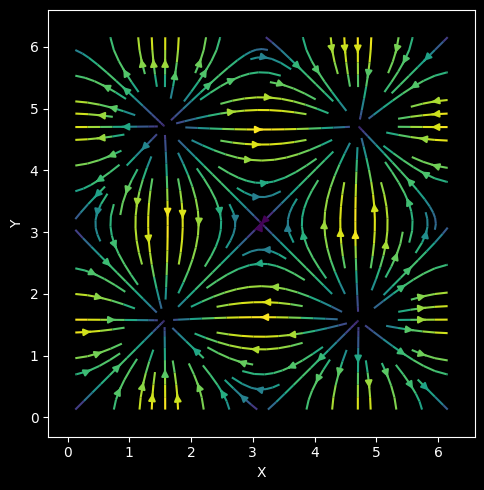

In [187]:
_ = plot(v, size=(5,5))

In [188]:
def make_step(v, dt=0.5):
    v = advect.semi_lagrangian(v, v, dt=dt)
    v = diffuse.implicit(v, 0.1, dt)
    v, _ = fluid.make_incompressible(v)
    return v

In [189]:
trj = iterate(make_step, batch(time=20), v)

/home/mmr/.pyenv/versions/3.12.7/lib/python3.12/site-packages/phiml/backend/_linalg.py:345: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = spsolve(lin[batch], y[batch])  # returns nan when diverges


In [190]:
plot(trj, animate="time", frame_time=100, size=(5,5))

<Figure size 640x480 with 0 Axes>